# Higher Education Students Performance Evaluation

## Data Source: Kaggle
https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation?select=student_prediction.csv

## Abstract:

The data was collected from the **Faculty of Engineering and Faculty of Educational Sciences students** in 2019. The purpose is to predict students' end-of-term performances using ML techniques.

#Columns and their Description

| Attribute | Description |
|---|---|
| Student ID | Unique identifier for each student |
| Age | 1: 18-21, 2: 22-25, 3: above 26 |
| Sex | 1: female, 2: male |
| High-school type | 1: private, 2: state, 3: other |
| Scholarship type | 1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full |
| Additional work | 1: Yes, 2: No |
| Artistic/sports activity | 1: Yes, 2: No |
| Partner | 1: Yes, 2: No |
| Total salary | 1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410 |
| Transportation | 1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other |
| Accommodation | 1: rental, 2: dormitory, 3: with family, 4: Other |
| Mother's education | 1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D. |
| Father's education | 1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D. |
| Number of siblings | 1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above |
| Parental status | 1: married, 2: divorced, 3: died - one of them or both |
| Mother's occupation | 1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other |
| Father's occupation | 1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other |
| Weekly study hours | 1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours |
| Reading frequency (non-scientific) | 1: None, 2: Sometimes, 3: Often |
| Reading frequency (scientific) | 1: None, 2: Sometimes, 3: Often |
| Seminar/conference attendance | 1: Yes, 2: No |
| Project impact | 1: positive, 2: negative, 3: neutral |
| Class attendance | 1: always, 2: sometimes, 3: never |
| Midterm exam 1 preparation | 1: alone, 2: with friends, 3: not applicable |
| Midterm exam 2 preparation | 1: closest date to the exam, 2: regularly during the semester, 3: never |
| Taking notes in classes | 1: never, 2: sometimes, 3: always |
| Listening in classes | 1: never, 2: sometimes, 3: always |
| Discussion impact | 1: never, 2: sometimes, 3: always |
| Flip-classroom | 1: not useful, 2: useful, 3: not applicable |
| Last semester GPA | 1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49 |
| Expected graduation GPA | 1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49 |
| Course ID | Unique identifier for the course |
| Output Grade | 0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA |

## **Importing the necessary modules**

In [371]:
from imblearn.over_sampling import ADASYN
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC
import tensorflow as tf

## **Loading the dataset and Viewing properties of the dataset**


In [372]:
higher_education_df = pd.read_csv('student_prediction.csv')
higher_education_df.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


Getting the **dimensions** or **shape** of my dataset

In [373]:
higher_education_df.shape

(145, 33)

Here we are using the **.info()** to get information concerning each columns i.e. **Dtype (data type)** and the total number of **Non-Null** rows for each column, as we can see it appears that all columns have all rows to be **Non-Null**  it should be a total of **145** non-null rows.

In [374]:
higher_education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   STUDENTID      145 non-null    object
 1   AGE            145 non-null    int64 
 2   GENDER         145 non-null    int64 
 3   HS_TYPE        145 non-null    int64 
 4   SCHOLARSHIP    145 non-null    int64 
 5   WORK           145 non-null    int64 
 6   ACTIVITY       145 non-null    int64 
 7   PARTNER        145 non-null    int64 
 8   SALARY         145 non-null    int64 
 9   TRANSPORT      145 non-null    int64 
 10  LIVING         145 non-null    int64 
 11  MOTHER_EDU     145 non-null    int64 
 12  FATHER_EDU     145 non-null    int64 
 13  #_SIBLINGS     145 non-null    int64 
 14  KIDS           145 non-null    int64 
 15  MOTHER_JOB     145 non-null    int64 
 16  FATHER_JOB     145 non-null    int64 
 17  STUDY_HRS      145 non-null    int64 
 18  READ_FREQ      145 non-null   

But the **.info()** gives us different info but if we want to know just the sum of nullable rows in each column in a better format, we would use the combination of **.isna()** and **sum()** methods.

In [375]:
higher_education_df.isna().sum()

,0
STUDENTID,0
AGE,0
GENDER,0
HS_TYPE,0
SCHOLARSHIP,0
WORK,0
ACTIVITY,0
PARTNER,0
SALARY,0
TRANSPORT,0


In [376]:
higher_education_df.dtypes

,0
STUDENTID,object
AGE,int64
GENDER,int64
HS_TYPE,int64
SCHOLARSHIP,int64
WORK,int64
ACTIVITY,int64
PARTNER,int64
SALARY,int64
TRANSPORT,int64


After checking the types of my data I have decided to drop the **STUDENTID** column one because it provides no useful information that would help us predict the grade and also it has a datatype of string and not categorical because each student have different unique id.

In [377]:
columns_to_remove = ['STUDENTID']
higher_education_df.drop(columns=columns_to_remove, inplace=True)

### **Checking the Statistical Properties of our data**
I am doing this to check the range of each column in our data, basically features of this data that would help me decide if I am to normalize my data or not. This is important to the machine learning algorithms I would be applying, and also so other techniques that I would not be using for this model training but important to know about, and here is a table for normalization.

| Algorithm | What Normalization Does |
|---|---|
| k-Nearest Neighbors (k-NN) | Ensures all features contribute equally to the distance metric. |
| Support Vector Machines (SVM) | Ensures all features contribute equally to the hyperplane's definition. |
| Gradient Descent-based Algorithms (e.g., Linear Regression, Logistic Regression, Neural Networks) | Stabilizes the gradients, leading to faster convergence and better performance. |
| Principal Component Analysis (PCA) | Ensures all features contribute equally to the principal component analysis. |

In [378]:
higher_education_df.describe()

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


so from the previous information and now with the statistical description of all my columns excluding the grade column it appears that my data are already on a similar scale, but still normalization or standardization could further improve the performance of some machine learning algorithms by preventing large values from dominating the learning process, also taking into consideration we have a small sample size, I must try as much as possible to prevent overfitting, before this I want to check the correlation between features in my table and to the grade(target column)

**Creating a correlation matrix to look for multicollinearity between features, which indicating these features are redundant and will not provide additional information for our machine learning model making our model unstable due to misinterpretation of model's coefficient.**

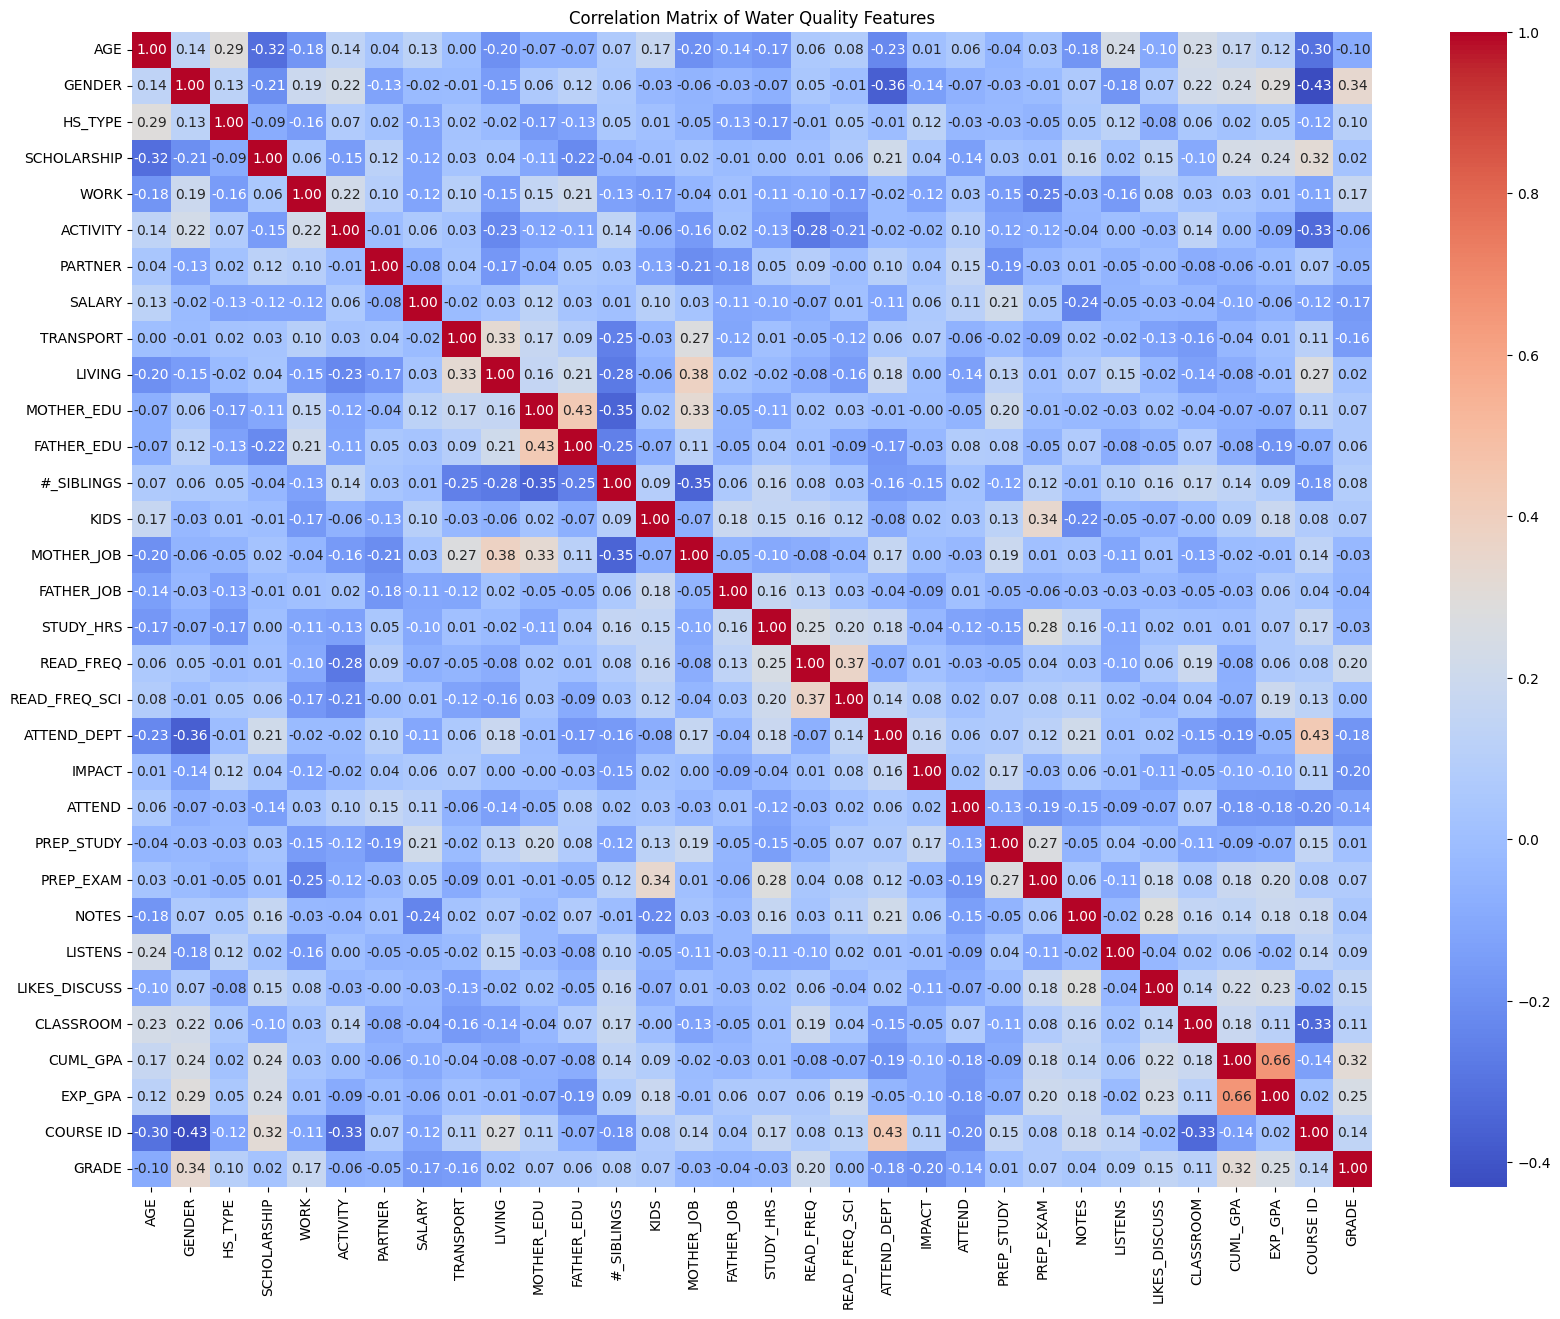

In [379]:
correlation_matrix = higher_education_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Water Quality Features")
plt.show()

### My Intuitions on Feature Analysis

**1. Multicollinearity:**

* **Observation:** The correlation heatmap revealed a high correlation (above 0.6) between 'cumlgpa' and 'expgpa', indicating potential multicollinearity.
* **Intuition:** Multicollinearity can make the model unstable and difficult to interpret due to redundant information.
* **Action:** To mitigate this, I'll remove one of the highly correlated features (e.g., 'expgpa') using: **higher_education_df.drop(columns=['EXP_GPA'], inplace=True)** and re-run my correlation analysis.

**2. Low Feature Correlation with Target:**

* **Observation:** None of the features show a strong correlation (absolute value >= 0.6) with the target variable ('Output Grade').
* **Intuition:** This suggests a potential lack of a strong *linear* relationship between individual features and the target. **However, this doesn't mean the features are useless.**
* **Considerations:**
    * **Complex Relationships:** Simple correlation analysis might not capture complex, non-linear relationships. Algorithms like decision trees, random forests, or neural networks could uncover these intricate patterns.
    * **Feature Interactions:**  The combined effect of features might be more predictive than individual features alone. For example, 'study hours' and 'attendance' together could be a stronger predictor than either one by itself.

In [380]:
higher_education_df.drop(columns=['EXP_GPA'], inplace=True)

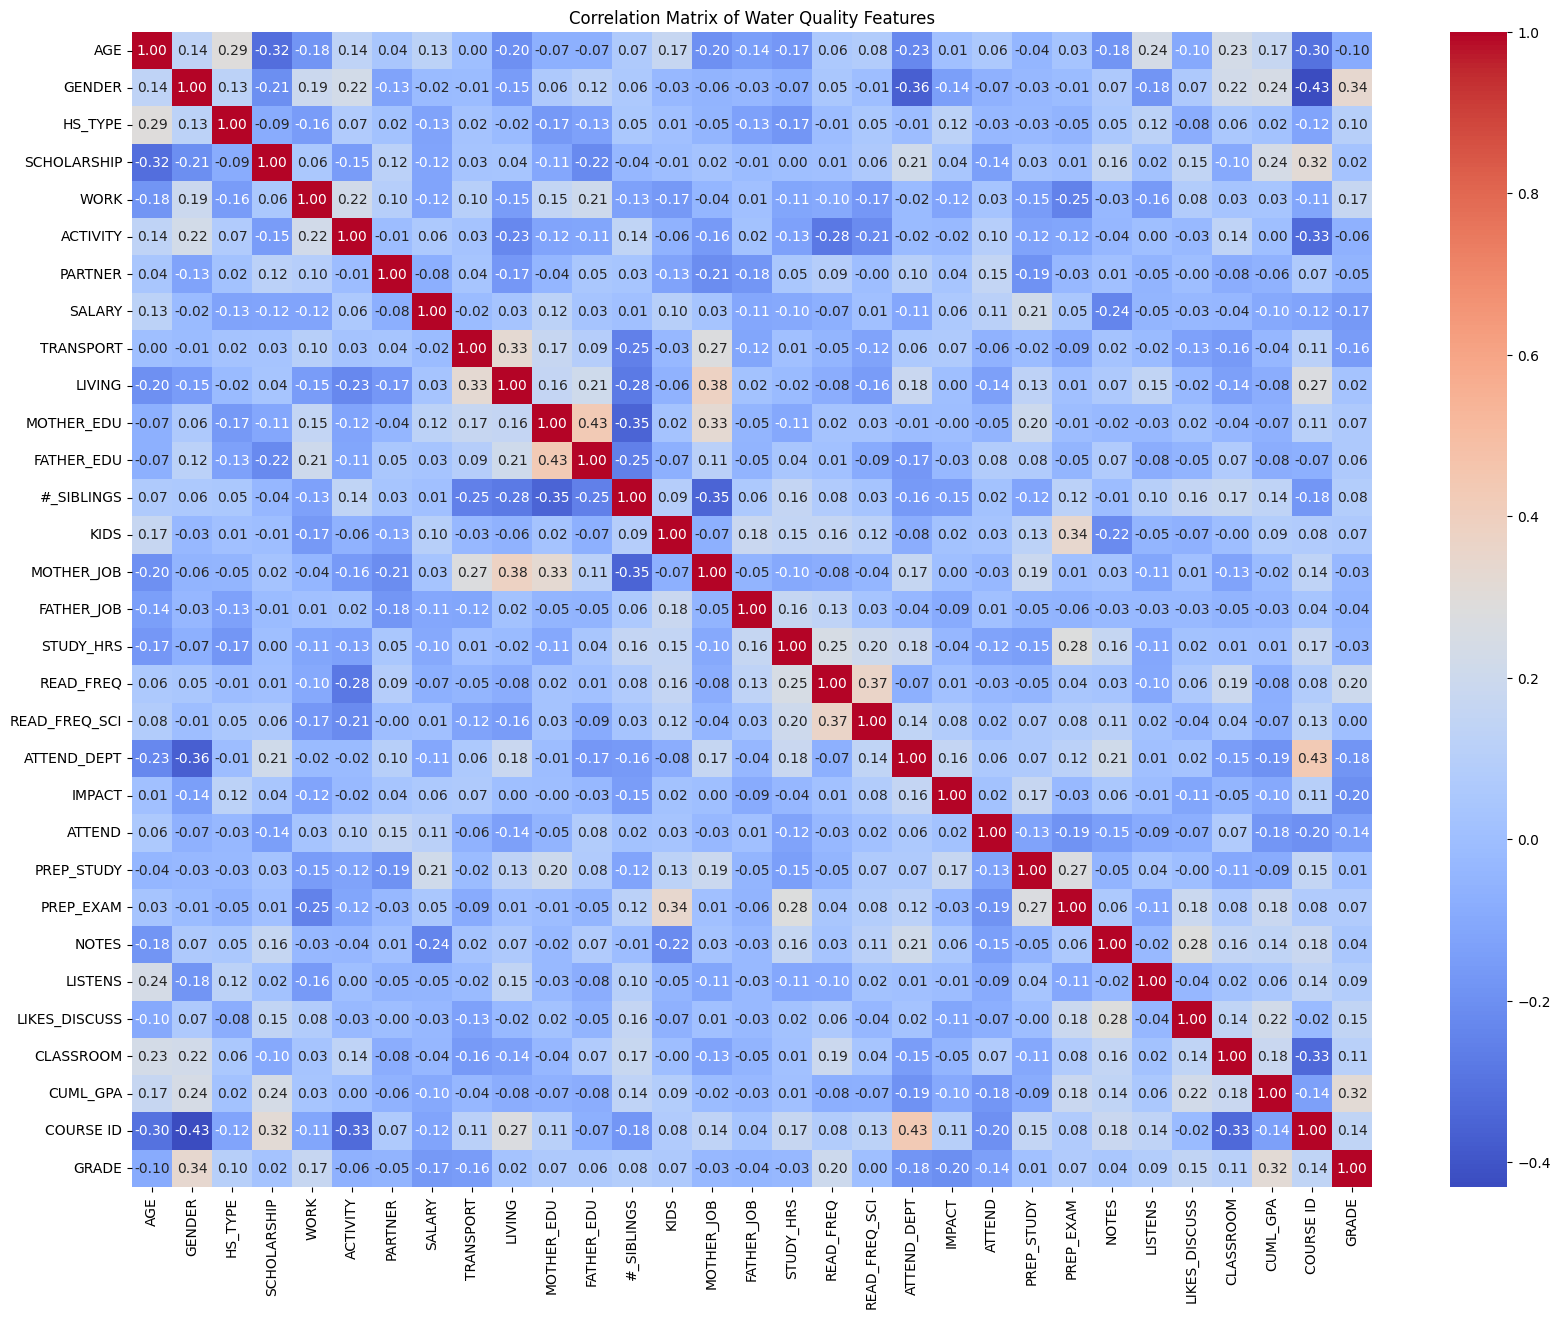

In [381]:
correlation_matrix = higher_education_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Water Quality Features")
plt.show()

# Checking GRADE(target class) for class imbalance

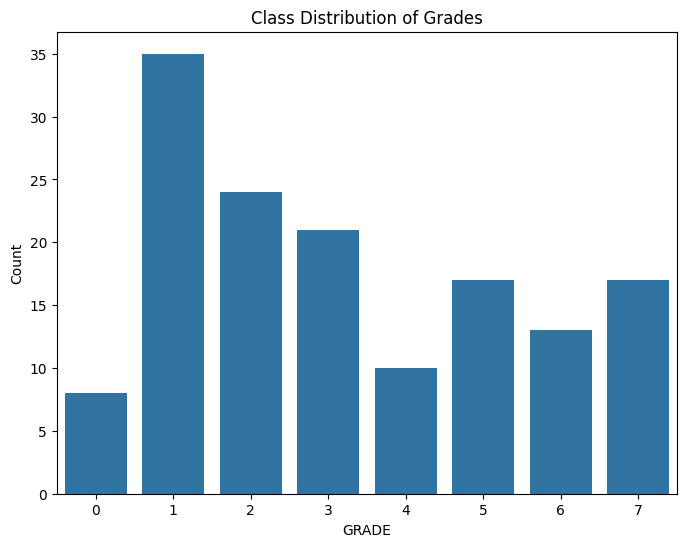

In [382]:
# Calculate the percentage of each class
class_percentages = higher_education_df['GRADE'].value_counts(normalize=True) * 100
# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='GRADE', data=higher_education_df)
plt.title('Class Distribution of Grades')
plt.xlabel('GRADE')
plt.ylabel('Count')
plt.show()

From the plot there is a trace of class imbalance and this is the lack of volume, variety in our dataset, so I would Introduce synthetic data in a more intelligent and mathematical way using **ADASYN** and also optimize the models to their best to avoid overfitting.

In [383]:
NUM_OF_ROWS = 5008
samples_per_class = NUM_OF_ROWS // higher_education_df['GRADE'].nunique()

strategy = {grade: samples_per_class for grade in higher_education_df['GRADE'].unique()}
adasyn = ADASYN(sampling_strategy=strategy, random_state=42)

X = higher_education_df.drop('GRADE', axis=1)
y = higher_education_df['GRADE']

X_resampled, y_resampled = adasyn.fit_resample(X, y)

augmented_df = pd.DataFrame(X_resampled, columns=X.columns)
augmented_df['GRADE'] = y_resampled

higher_education_df = augmented_df

# 6. Verify:
print("higher_education_df shape:", higher_education_df.shape)
print(higher_education_df['GRADE'].value_counts())

higher_education_df shape: (5001, 31)
GRADE
3    629
0    627
4    627
6    626
1    625
2    625
7    622
5    620
Name: count, dtype: int64


#Ensuring data from each class is included in the train, validation, and test sets, since there is an imbalance of class we want each data splits to have some info about some certain class so complex relationship can be learnt from it also.

In [384]:
# Stratified Split for Train and Test
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
for train_index, test_index in sss.split(higher_education_df, higher_education_df['GRADE']):
    train_df, test_df = higher_education_df.iloc[train_index], higher_education_df.iloc[test_index]

# Stratified Split for Train and Validation
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)
for train_index, val_index in sss.split(train_df, train_df['GRADE']):
    train_df, val_df = train_df.iloc[train_index], train_df.iloc[val_index]


# Extract features and labels
train_labels = np.array(train_df.pop('GRADE')).reshape(-1, 1)
val_labels = np.array(val_df.pop('GRADE')).reshape(-1, 1)
test_labels = np.array(test_df.pop('GRADE')).reshape(-1, 1)

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

print("Train set size:", train_df.shape)
print("Validation set size:", val_df.shape)
print("Test set size:", test_df.shape)

Train set size: (3612, 30)
Validation set size: (638, 30)
Test set size: (751, 30)


## Reasoning:

* **`StratifiedShuffleSplit`:** This function ensures that the proportion of samples in each class is maintained across the train, validation, and test sets. This is crucial for datasets with class imbalance.
* **`n_splits=1`:** We only need one split for each stage (train/test and train/validation).
* **`test_size` and `random_state`:** These parameters control the size of the test/validation sets and the randomness of the split, respectively.
* **`sss.split`:** This method generates the indices for splitting the data based on the specified stratification (using the 'Output Grade' column).
* **`iloc`:** This is used to select rows based on the generated indices.

**Normalize the data to ensure all features are in the same range, for this we will be using the sklearn StandardScaler. This will set the mean to 0 and standard deviation to 1**

**Note: The StandardScaler is only fit using the train_features to be sure the model is not peeking at the validation or test sets.**

In [385]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (3612, 1)
Validation labels shape: (638, 1)
Test labels shape: (751, 1)
Training features shape: (3612, 30)
Validation features shape: (638, 30)
Test features shape: (751, 30)


In [386]:
NUM_CLASSES = higher_education_df['GRADE']
print('List of classes sorted:', sorted(NUM_CLASSES.unique()))
print('Number of classes:', NUM_CLASSES.nunique())

List of classes sorted: [0, 1, 2, 3, 4, 5, 6, 7]
Number of classes: 8


#Build the Models
Now create and train your model using the function that was defined earlier. Notice that the model is fit using a small default batch size of 32, since we have done some processing to handle class imbalance a bit.

In [387]:
# leave the labels at default state for sparse categorical cross entropy.
train_labels_1 = train_labels.reshape(-1)
val_labels_1 = val_labels.reshape(-1)
test_labels_1 = test_labels.reshape(-1)

In [388]:
# Convert labels to one-hot encoding categorical cross entropy wants labels to be in one hot encoded form
# NUM_CLASSES.nunique() is 8
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=NUM_CLASSES.nunique())
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes=NUM_CLASSES.nunique())

In [389]:
EPOCHS = 30
BATCH_SIZE = 32

In [390]:
def loss_curve_plot(history):
  # Plot training & validation loss values
  plt.figure(figsize=(12, 6))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

In [391]:
def accuracy_plot(history):
  # Plot training & validation accuracy values
  plt.figure(figsize=(12, 6))
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

In [392]:
def confusion_matrix_plot(test_labels, test_predictions):
  # Create the confusion matrix
  cm = confusion_matrix(test_labels, test_predictions)

  # Visualizing the confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()


In [393]:
def categorical_metrics_result(model, test_features, test_labels):
  test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_features, tf.keras.utils.to_categorical(test_labels, num_classes=NUM_CLASSES.nunique()))
  test_predictions = model.predict(test_features)
  # Convert predictions to class labels by selecting the index of the highest probability
  test_predictions = np.argmax(test_predictions, axis=1)
  f1 = f1_score(test_labels, test_predictions, average='weighted')

  print(f'Test Loss: {test_loss}')
  print(f'Test Accuracy: {test_accuracy}')
  print(f'Test Precision: {test_precision}')
  print(f'Test Recall: {test_recall}')
  print(f'Test F1 Score: {f1}')

In [394]:
def sparse_categorical_metrics_result(model, test_features, test_labels, test_predictions):
  test_loss, test_accuracy = model.evaluate(test_features, test_labels)
  precision = precision_score(test_labels, test_predictions, average='weighted')
  recall = recall_score(test_labels, test_predictions, average='weighted')
  f1 = f1_score(test_labels, test_predictions, average='weighted')

  print(f'Test Loss: {test_loss}')
  print(f'Test Precision: {precision}')
  print(f'Test Recall: {recall}')
  print(f'Test F1 Score: {f1}')
  print(f'Test Accuracy: {test_accuracy}')

In [395]:
def svm_metrics_result(model, test_features, test_labels, val_features, val_labels):
  # Make predictions on the validation set
  val_predictions = model.predict(val_features)

  # Evaluate the model
  val_accuracy = accuracy_score(val_labels, val_predictions)

  # Make predictions on the test set and gets the accuracy
  test_predictions = model.predict(test_features)
  test_accuracy = accuracy_score(test_labels, test_predictions)


  # Calculate precision, recall, and F1-score
  precision = precision_score(test_labels, test_predictions, average='weighted')
  recall = recall_score(test_labels, test_predictions, average='weighted')
  f1 = f1_score(test_labels, test_predictions, average='weighted')

  print(f"Validation Accuracy: {val_accuracy}")
  print(f"Test Accuracy: {test_accuracy}")
  print(f'Test Precision: {precision}')
  print(f'Test Recall: {recall}')
  print(f'Test F1 Score: {f1}')

In [396]:
def save_neural_network(model, name):
  model.save("{0}_model.h5".format(name))

In [397]:
def save_svm(model, name):
  joblib.dump(model, "{0}_model.pkl".format(name))

#**First Model**
first default optimizer: adam

first default learning rate: 0.001

default loss: categorical cross entropy

metrics: accuracy, precision, recall



In [398]:
def first_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=16, activation='relu', input_shape=(train_features.shape[-1],)),
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=NUM_CLASSES.nunique(), activation='softmax') # Output layer with correct number of units
    ])

    # Compile the model
    # Use CategoricalCrossentropy and CategoricalAccuracy for one-hot encoded targets
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss=tf.keras.losses.CategoricalCrossentropy(), # Changed to CategoricalCrossentropy
                  metrics=[tf.keras.metrics.CategoricalAccuracy(name="accuracy"), # Changed to CategoricalAccuracy
                           tf.keras.metrics.Precision(name='precision'),
                           tf.keras.metrics.Recall(name='recall')])


    return model

# Create the model instance
model = first_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [399]:
history = model.fit(
    train_features,
    train_labels,  # Use the correctly shaped labels
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(val_features, val_labels)  # Use the correctly shaped labels
)

Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2008 - loss: 2.0821 - precision: 0.6053 - recall: 0.0031 - val_accuracy: 0.4467 - val_loss: 1.6714 - val_precision: 0.9524 - val_recall: 0.0313
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4725 - loss: 1.5592 - precision: 0.9275 - recall: 0.0860 - val_accuracy: 0.5972 - val_loss: 1.2210 - val_precision: 0.8708 - val_recall: 0.2429
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6081 - loss: 1.1722 - precision: 0.8566 - recall: 0.2849 - val_accuracy: 0.6865 - val_loss: 0.9356 - val_precision: 0.8542 - val_recall: 0.4498
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7061 - loss: 0.9115 - precision: 0.8587 - recall: 0.4782 - val_accuracy: 0.7367 - val_loss: 0.7645 - val_precision: 0.8797 - val_recall: 0.5846
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7509 - loss: 0.7544 - precision: 0.8632 - recall: 0.5872 - val_accuracy: 0.7712 - val_loss: 0.

In [400]:
# Predict labels for the test set
test_predictions = model.predict(test_features)
test_predictions = np.argmax(test_predictions, axis=1)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [401]:
# Print out metrics
categorical_metrics_result(model, test_features, test_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9724 - loss: 0.0984 - precision: 0.9768 - recall: 0.9692 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test Loss: 0.09908383339643478
Test Accuracy: 0.9733688235282898
Test Precision: 0.9771811962127686
Test Recall: 0.9693741798400879
Test F1 Score: 0.9732115847063288


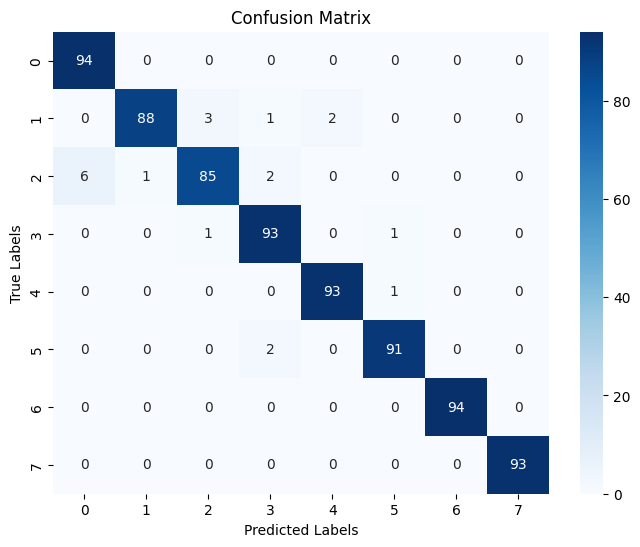

In [402]:
# Create the confusion matrix
confusion_matrix_plot(test_labels, test_predictions)

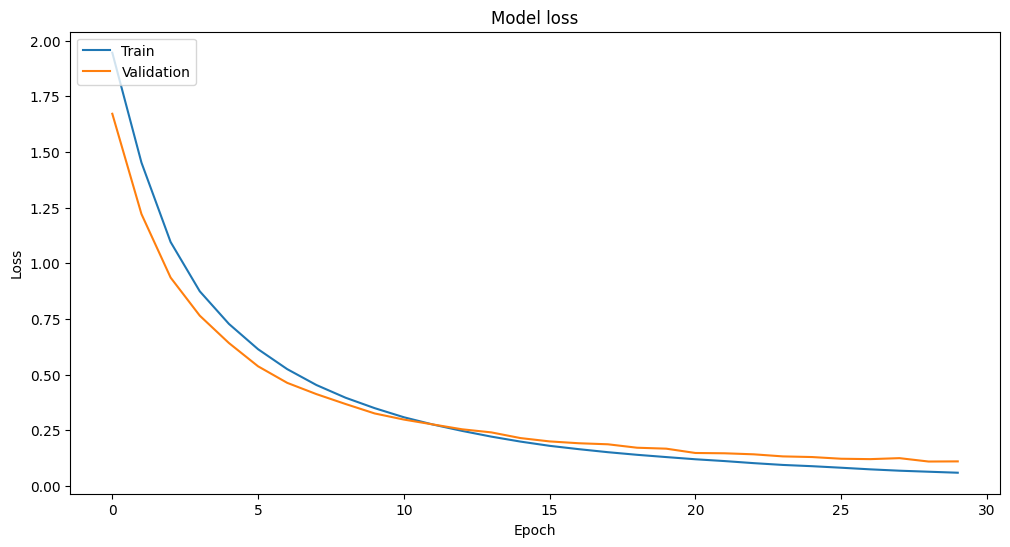

In [403]:
# Plot loss curve
loss_curve_plot(history)

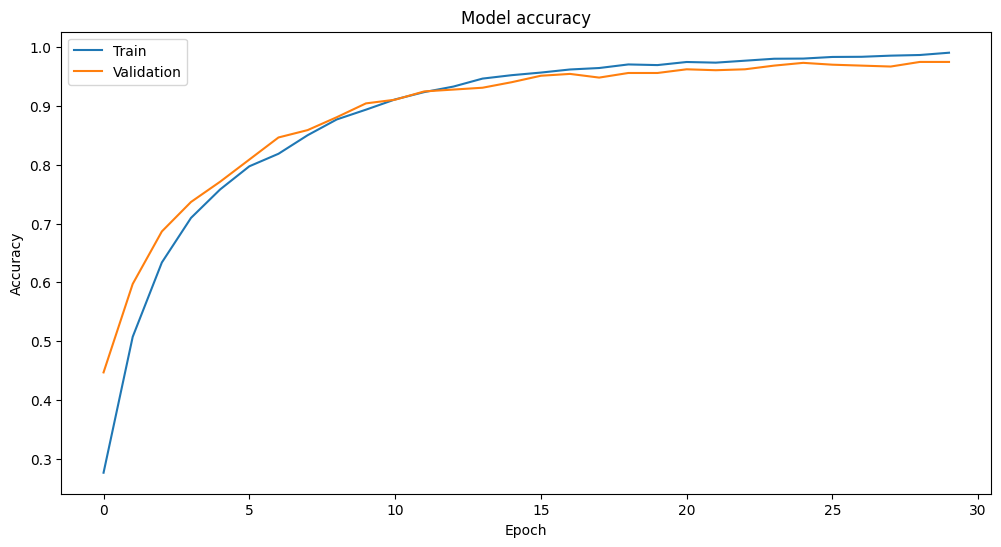

In [404]:
# Plot accuracy curve
accuracy_plot(history)

In [405]:
# save model
save_neural_network(model, "adam")

#**Second Model**
second optimizer: sgd

second default learning rate: 0.01

second loss: categorical cross entropy

metrics: accuracy, precision, recall

In [406]:
def second_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=16, activation='relu', input_shape=(train_features.shape[-1],)),
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=NUM_CLASSES.nunique(), activation='softmax') # Output layer with correct number of units
    ])

    # Compile the model
    # Use CategoricalCrossentropy and CategoricalAccuracy for one-hot encoded targets
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2),
                  loss=tf.keras.losses.CategoricalCrossentropy(), # Changed to CategoricalCrossentropy
                  metrics=[tf.keras.metrics.CategoricalAccuracy(name="accuracy"), # Changed to CategoricalAccuracy
                           tf.keras.metrics.Precision(name='precision'),
                           tf.keras.metrics.Recall(name='recall')])


    return model

# Create the model instance
model = second_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [407]:
history = model.fit(
    train_features,
    train_labels,  # Use the correctly shaped labels
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(val_features, val_labels)  # Use the correctly shaped labels
)

Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1382 - loss: 2.2040 - precision: 0.0039 - recall: 2.7714e-05 - val_accuracy: 0.1881 - val_loss: 1.9937 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2325 - loss: 1.9424 - precision: 0.9211 - recall: 0.0050 - val_accuracy: 0.3119 - val_loss: 1.8350 - val_precision: 1.0000 - val_recall: 0.0219
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3511 - loss: 1.7842 - precision: 0.9790 - recall: 0.0391 - val_accuracy: 0.3918 - val_loss: 1.7071 - val_precision: 0.9394 - val_recall: 0.0486
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4344 - loss: 1.6643 - precision: 0.9391 - recall: 0.0643 - val_accuracy: 0.4671 - val_loss: 1.5928 - val_precision: 0.9492 - val_recall: 0.0878
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4609 - loss: 1.5649 - precision: 0.9246 - recall: 0.0933 - val_accuracy: 0.4953 -

In [408]:
# Predict labels for the test set
test_predictions = model.predict(test_features)
test_predictions = np.argmax(test_predictions, axis=1)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [409]:
categorical_metrics_result(model, test_features, test_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8966 - loss: 0.3671 - precision: 0.9185 - recall: 0.8545 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test Loss: 0.3916524648666382
Test Accuracy: 0.8841544389724731
Test Precision: 0.9224011898040771
Test Recall: 0.8388814926147461
Test F1 Score: 0.8822574147670196


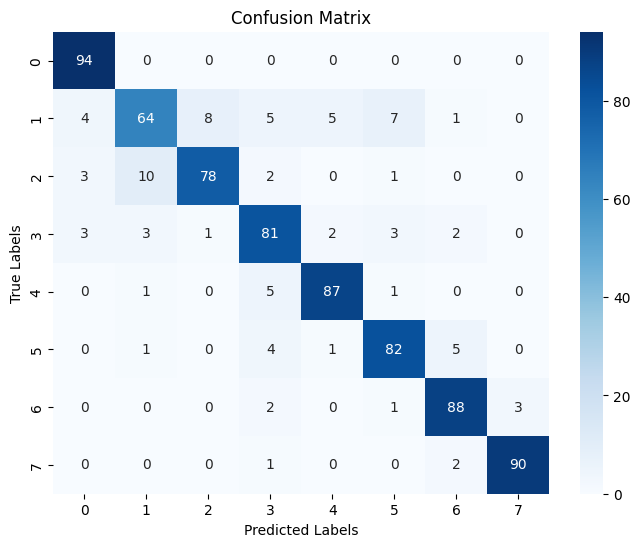

In [410]:
# Create the confusion matrix
confusion_matrix_plot(test_labels, test_predictions)

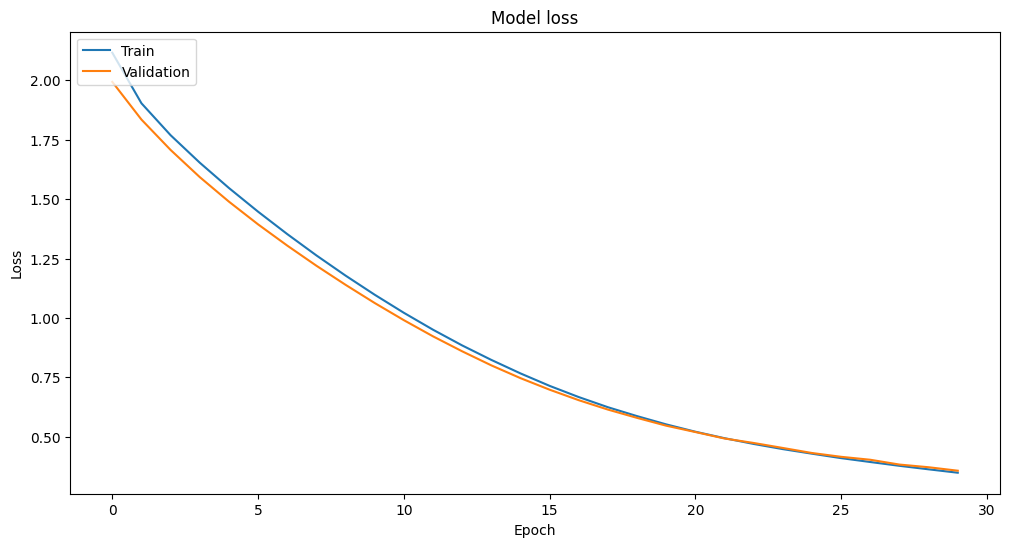

In [411]:
# Plot loss curve
loss_curve_plot(history)

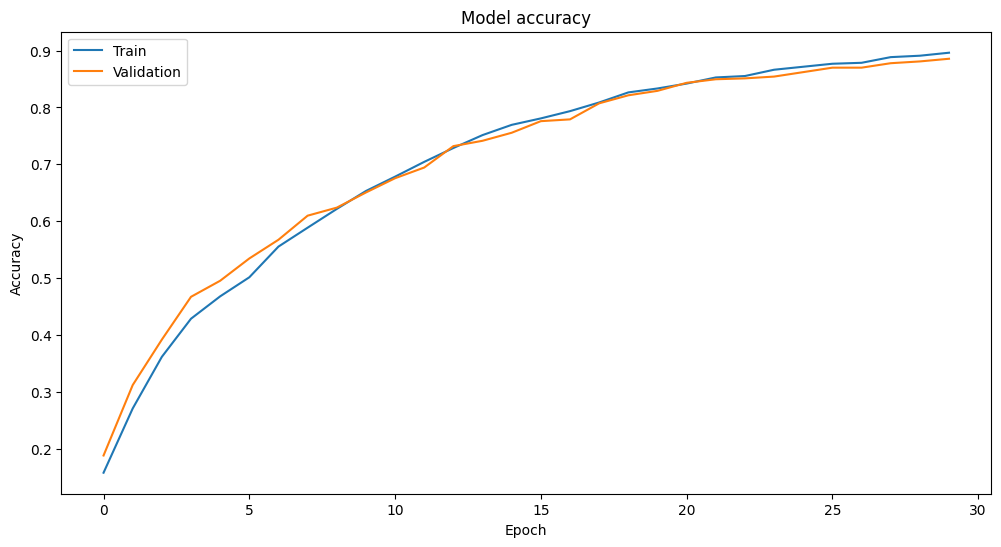

In [412]:
# Plot accuracy curve
accuracy_plot(history)

In [413]:
# save model
save_neural_network(model, "sgd")

#**Third Model**
third optimizer: rmsprop

third default learning rate: 0.001

default loss: sparse categorical cross entropy

metrics: accuracy, precision, recall



when using sparse categorical entropy there are few things you must take note off

1. your labels must be in one dimension i.e. an array most of put labels would be in 2 dimensions, so reshape your labels(train, val, test) in one dimension if it is not.

2. The metrics accuracy, categorical accuracy, precison, and recall can't work with it because they require one hot encoded labels so only binarycrossentropy and categorical cross entropy use these metrics, spare categorical cross entropy uses sparse categorical accuracy for the one I just know

In [414]:
def third_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=16, activation='relu', input_shape=(train_features.shape[-1],)),
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=NUM_CLASSES.nunique(), activation='softmax') # Output layer with correct number of units
    ])

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")]) #


    return model

# Create the model instance
model = third_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [415]:
history = model.fit(
    train_features,
    train_labels_1,  # Use the correctly shaped labels
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(val_features, val_labels_1)  # Use the correctly shaped labels
)

Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1595 - loss: 2.1042 - val_accuracy: 0.3777 - val_loss: 1.7855
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4274 - loss: 1.7167 - val_accuracy: 0.5752 - val_loss: 1.3907
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6046 - loss: 1.3374 - val_accuracy: 0.6787 - val_loss: 1.0582
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6955 - loss: 1.0061 - val_accuracy: 0.7414 - val_loss: 0.8367
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7573 - loss: 0.7965 - val_accuracy: 0.8025 - val_loss: 0.6812
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8088 - loss: 0.6390 - val_accuracy: 0.8292 - val_loss: 0.5695
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8555 - loss: 0.5008 - val_accuracy: 0.8542 - val_loss: 0.4802
Epoch 8/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8695 - loss: 0.4410 - val_accuracy: 0.

In [416]:
# Predict labels for the test set
test_predictions = model.predict(test_features)
test_predictions = np.argmax(test_predictions, axis=1)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [417]:
# Print out metrics
sparse_categorical_metrics_result(model, test_features, test_labels_1, test_predictions)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9692 - loss: 0.1274 
Test Loss: 0.13375702500343323
Test Precision: 0.9720308154123776
Test Recall: 0.9720372836218375
Test F1 Score: 0.9719929800651967
Test Accuracy: 0.9720372557640076


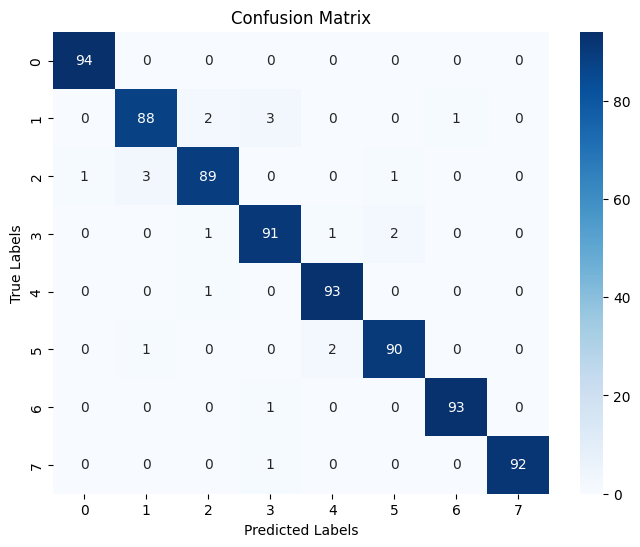

In [418]:
# Create the confusion matrix
confusion_matrix_plot(test_labels_1, test_predictions)

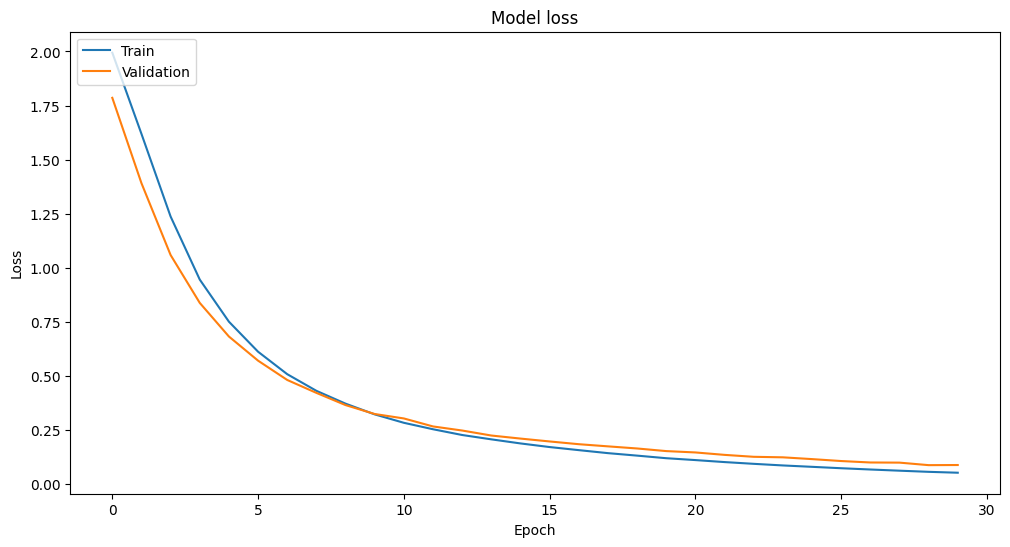

In [419]:
# Plot loss curve
loss_curve_plot(history)

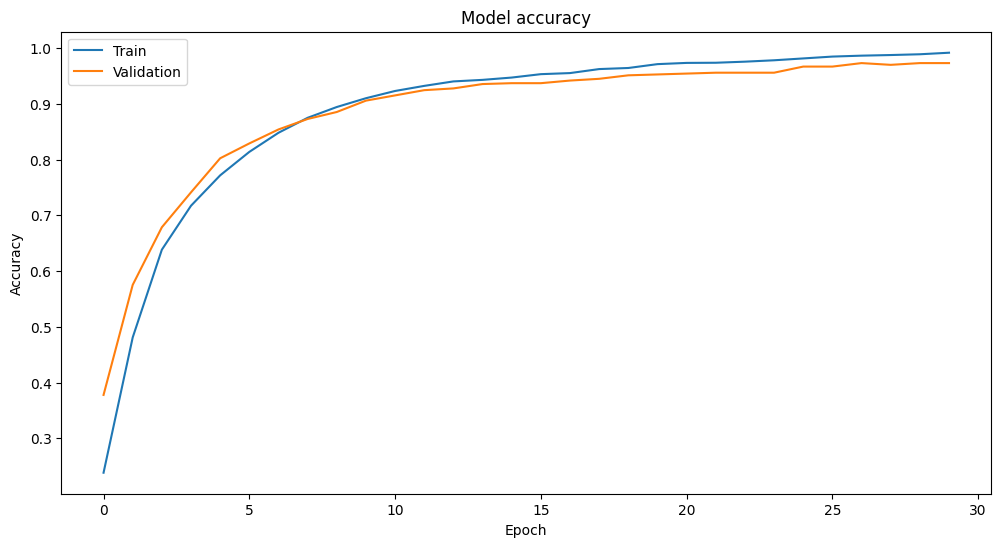

In [420]:
# Plot accuracy curve
accuracy_plot(history)

In [421]:
# save model
save_neural_network(model, "rmsprop")

#**Fourth Model**
fourth optimizer: adagrad

fourth default learning rate: 0.001

default loss: sparse categorical cross entropy

metrics: accuracy, precision, recall

In [422]:
def fourth_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=16, activation='relu', input_shape=(train_features.shape[-1],)),
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(units=NUM_CLASSES.nunique(), activation='softmax') # Output layer with correct number of units
    ])

    model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-3),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")]) #


    return model

# Create the model instance
model = fourth_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [423]:
history = model.fit(
    train_features,
    train_labels_1,  # Use the correctly shaped labels
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(val_features, val_labels_1)  # Use the correctly shaped labels
)

Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1523 - loss: 2.1647 - val_accuracy: 0.1661 - val_loss: 2.1304
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1633 - loss: 2.1257 - val_accuracy: 0.1834 - val_loss: 2.0916
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1843 - loss: 2.1009 - val_accuracy: 0.1959 - val_loss: 2.0620
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2090 - loss: 2.0468 - val_accuracy: 0.2163 - val_loss: 2.0377
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2165 - loss: 2.0322 - val_accuracy: 0.2335 - val_loss: 2.0167
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2219 - loss: 2.0122 - val_accuracy: 0.2382 - val_loss: 1.9981
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2345 - loss: 1.9823 - val_accuracy: 0.2429 - val_loss: 1.9812
Epoch 8/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2303 - loss: 1.9814 - val_accuracy: 0.

In [424]:
# Predict labels for the test set
test_predictions = model.predict(test_features)
test_predictions = np.argmax(test_predictions, axis=1)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [425]:
# Print out metrics
sparse_categorical_metrics_result(model, test_features, test_labels_1, test_predictions)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4235 - loss: 1.7325 
Test Loss: 1.7573652267456055
Test Precision: 0.43309413869644625
Test Recall: 0.3981358189081225
Test F1 Score: 0.37476004844723426
Test Accuracy: 0.39813581109046936


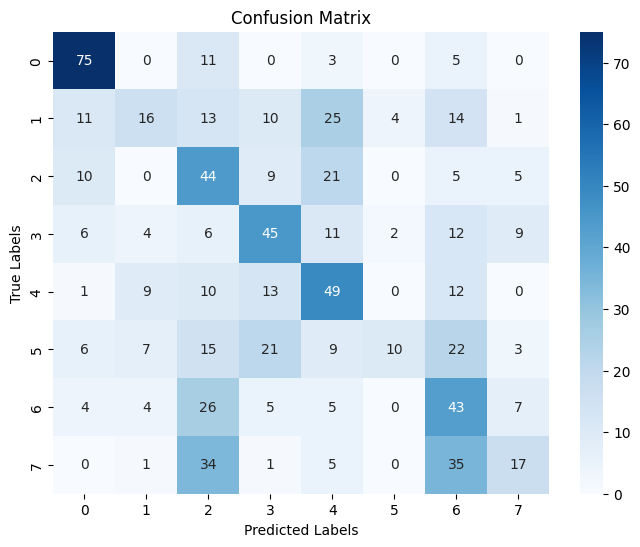

In [426]:
# Create the confusion matrix
confusion_matrix_plot(test_labels_1, test_predictions)

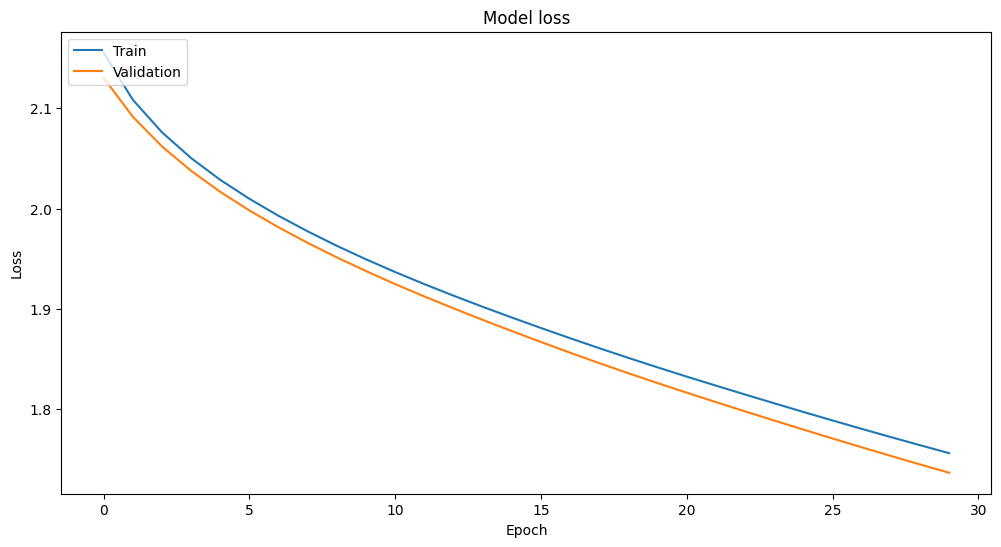

In [427]:
# Plot loss curve
loss_curve_plot(history)

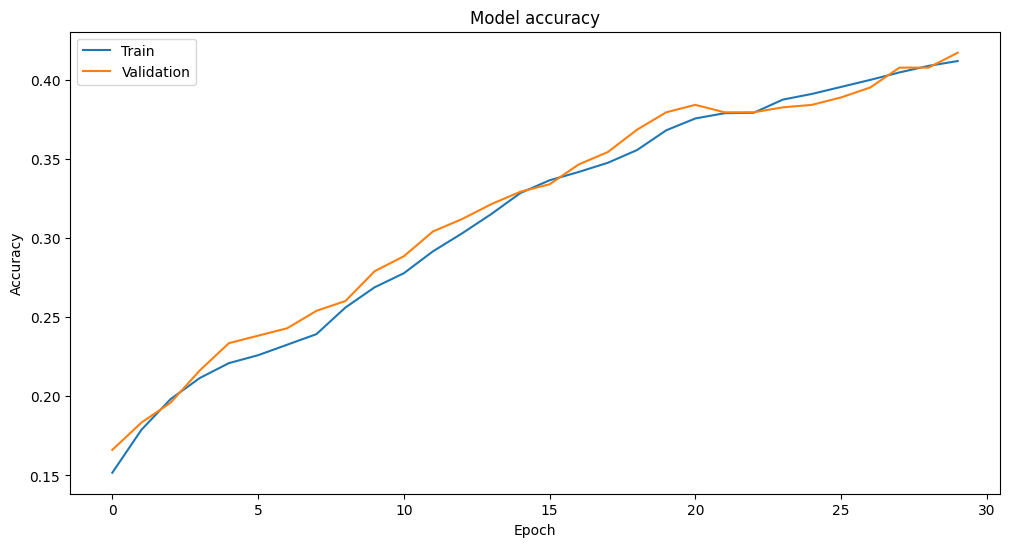

In [428]:
# Plot accuracy curve
accuracy_plot(history)

In [429]:
# save model
try:
  save_neural_network(model, "adagrad")
except ValueError:
  pass

# Traditional Method

**Support Vector Machines**

**Note:** LinearSVC and NuSVC, unlike neural networks, doesn't directly provide the loss on the training set. It focuses on finding the optimal hyperplane for classification.

#**LINEAR SUPPORT VECTOR CLASSIFICATION**

In [430]:
# Creates and train a LinearSVC model
def fourth_model():
  return LinearSVC(
            penalty='l2',
            loss='squared_hinge',
            dual=False,
            tol=1e-3,
            C=5.5,
            intercept_scaling=6.0,
            max_iter=1000
        )

svc_model = fourth_model()
svc_model.fit(train_features, train_labels_1)

LinearSVC(C=5.5, dual=False, intercept_scaling=6.0, tol=0.001)

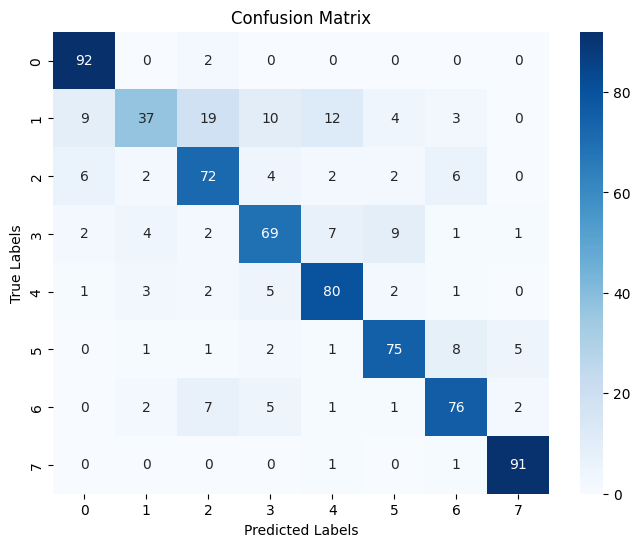

In [431]:
# Plot confusion matrix
test_predictions = svc_model.predict(test_features)
confusion_matrix_plot(test_labels_1, test_predictions)

In [432]:
# Print fourth model metrics
svm_metrics_result(svc_model, test_features, test_labels_1, val_features, val_labels_1)

Validation Accuracy: 0.8134796238244514
Test Accuracy: 0.7882822902796272
Test Precision: 0.7859708708006216
Test Recall: 0.7882822902796272
Test F1 Score: 0.7786466269386887


In [433]:
# Save model
save_svm(svc_model, "linear")

#**NU-SUPPORT VECTOR CLASSIFICATION**

In [434]:
# Create and train a NuSVC model
def fifth_model():
  return NuSVC(
            nu=0.5,
            kernel='rbf',
            gamma='scale'
        )
nusvc_model = fifth_model()
nusvc_model.fit(train_features, train_labels_1)

NuSVC()

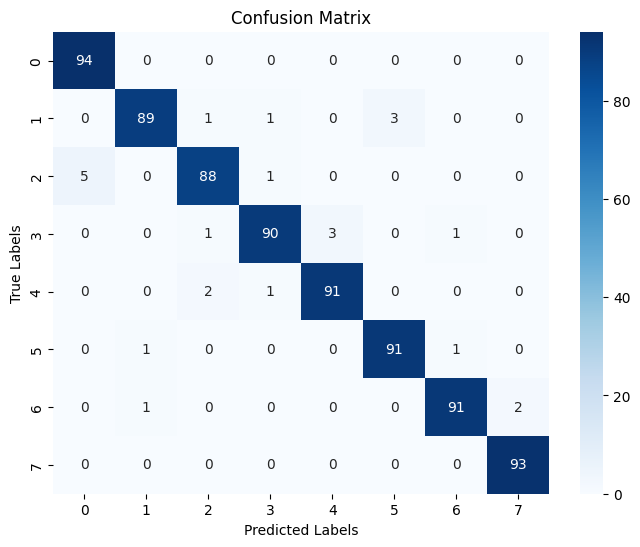

In [435]:
# Plot confusion matrix
test_predictions = nusvc_model.predict(test_features)
confusion_matrix_plot(test_labels_1, test_predictions)

In [436]:
# Print fourth model metrics
svm_metrics_result(nusvc_model, test_features, test_labels_1, val_features, val_labels_1)

Validation Accuracy: 0.9749216300940439
Test Accuracy: 0.9680426098535286
Test Precision: 0.9681592986900809
Test Recall: 0.9680426098535286
Test F1 Score: 0.9679391900774224


In [437]:
# Save model
save_svm(nusvc_model, "nusvc")